# Métodos de control de velocidad del Motor Asincrónico

## Característica mecánica
Recordamos la ecuación de la característica mecánica del Motor Asincrónico

$$M={{3U_f^2r_2'} \over {\omega_s[(r_1+{r_2' \over s})^2+(x_1+x_2')^2}]s}$$

además:

$$M_c={{3U_f^2} \over {2\omega_0[r_1 \pm \sqrt{r_1^2+(x_1+x_2')^2]}}}$$

$$s_c=\pm{r_2' \over {\sqrt{r_1^2+(x_1+x_2')^2}}}$$ 

Veamos los datos de chapa para un motor ejemplo: MTB-312-6.

In [1]:
Un = 380/3**0.5 # V de fase
Pn = 16 # Kw
Nn = 955 # rpm
landa = 2.8 # Mc/Mn
pf = 0.77 # Factor de potencia
I1n = 37.6 # A
R1 = 0.33
X1 = 0.41
R2 = 0.099
X2 = 0.25
ke = 1.75 # R2' = ke^2 * R2
p  = 3 # Pares de polos

In [2]:
import numpy as np

$\omega_0=1000$rpm porque la frecuencia de la red es 50Hz y calculamos su valor en rad/s:

In [3]:
w0 = 1000*np.pi/30
print(F"w0={w0:.0f}rad/s")

w0=105rad/s


Calculamos $r_2'=k_e^2r_2$ y  $x_2'=k_e^2x_2$

In [4]:
R2r = ke**2*R2
X2r = ke**2*X2
print(F"R2r={R2r:.2f}ohm")
print(F"X2r={X2r:.2f}ohm")

R2r=0.30ohm
X2r=0.77ohm


In [5]:
Mc = 3*Un**2/(2*w0*(R1+(R1**2+(X1+X2r)**2)**0.5))
Sc = R2r/(R1**2+(X1+X2r)**2)**0.5
print(F"Mc={Mc:.0f}Nm")
print(F"Sc={Sc:.2f}")

Mc=445Nm
Sc=0.25


## Variación de la resistencia del rotor
![circuito](img/Wound_Rotor_Motor_Power_Circuit.jpg)

Vamos a poner 3 resistencias adicionales distintas

In [6]:
Ra1 = 0.4
Ra2 = 0.8
Ra3 = 1.8

Evaluamos un vector de momentos para los 4 valores de resistencia da armadura.

In [7]:
s = np.linspace(-0.05, 1.2, 100)
M = (3*Un**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
Mr1 = (3*Un**2*(R2r+Ra1))/(w0*s*((R1+(R2r+Ra1)/s)**2+(X1+X2r)**2))
Mr2 = (3*Un**2*(R2r+Ra2))/(w0*s*((R1+(R2r+Ra2)/s)**2+(X1+X2r)**2))
Mr3 = (3*Un**2*(R2r+Ra3))/(w0*s*((R1+(R2r+Ra3)/s)**2+(X1+X2r)**2))
w = (1-s)*w0

Ahora trazamos las 4 curvas

Text(0, 0.5, '$\\omega$ (rad/s)')

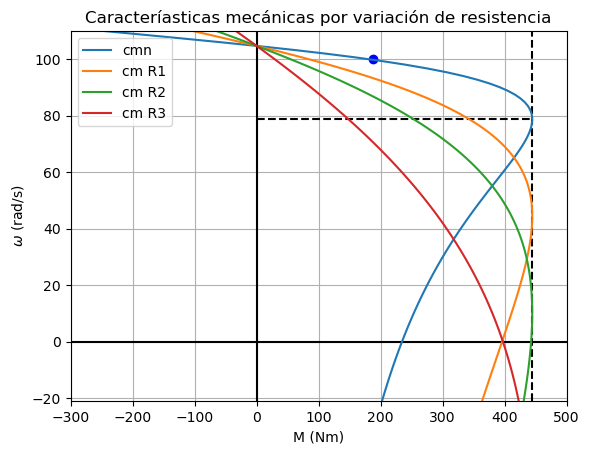

In [8]:
import matplotlib.pyplot as pyl

# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# Punto de operación nominal
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))
pyl.plot(Mn, wn, 'bo')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mr1, w, label="cm R1")
pyl.plot(Mr2, w, label="cm R2")
pyl.plot(Mr3, w, label="cm R3")

# Detalles del gráfico
pyl.title("Caracteríasticas mecánicas por variación de resistencia")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por la disminución de la rigidez. Dmáx= 2:1  3:1.

**Gradualidad** a saltos por la gran corriente de armadura que no permite usar reóstato.

**Estabilidad** empeora con el aumento del $s_c={r_2' \over {\sqrt{r_1^2+(x_1+x_2')^2}}}$.

**Factibilidad Económica** Inversión inicial baja y circuito simple. Pero la eficiencia energética es mala pues se disipa gran potencia en las resistencias (hasta el 50# de la energía consumida).

**Carga permisible** Carga tipo ventilador y en algunos casos dentro de un rango limitado, carga de momento constante.

**Dirección del control** Por debajo de las velocidades básicas.

## Control por pulsos en el rotor
![circuito](img/Motor_CA_pulsos_rotor.jpg)

Esta vez se definen las resistencias del circuito como $R_{ad}$ y $R_{ext}$. Los extremos se optienen para cuando no hay conducción del tiristor ($R_{ad}+R_{ext}$) y cuando conduce todo el tiempo ($R_{ad}$).

In [9]:
Rad = 0.1 # ohm
Rext = 5 # ohm
print(F"Rad={Rad:.2f}ohm")
print(F"Rext={Rext:.2f}ohm")

Mrad = (3*Un**2*(R2r+Rad))/(w0*s*((R1+(R2r+Rad)/s)**2+(X1+X2r)**2))
Mrext = (3*Un**2*(R2r+Rad+Rext))/(w0*s*((R1+(R2r+Rad+Rext)/s)**2+(X1+X2r)**2))

Rad=0.10ohm
Rext=5.00ohm


Ahora trazamos las 3 curvas

Text(0, 0.5, '$\\omega$ (rad/s)')

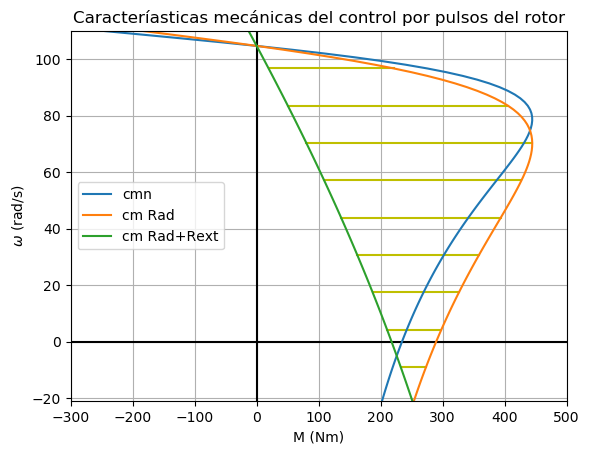

In [10]:
# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Zona de control
for i in range(10,100,10):
    x = np.linspace(Mrext[i], Mrad[i], 100)
    pyl.plot(x, w[i]*np.ones(100), 'y')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mrad, w, label="cm Rad")
pyl.plot(Mrext, w, label="cm Rad+Rext")

# Detalles del gráfico
pyl.title("Caracteríasticas mecánicas del control por pulsos del rotor")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por el número de resistencias. Dmáx= 2:1  3:1.

**Gradualidad** suave pues se utiliza un reóstato para variar el ángulo de disparo del tiristor. Éste es el único indicador que cambia con respecto al control por resistencias en el rotor.

**Estabilidad** empeora con el aumento del $s_c{r_2' \over {\sqrt{r_1^2+(x_1+x_2')^2}}}$.

**Factibilidad Económica** Inversión inicial baja y circuito simple. Pero la eficiencia energética es mala pues se disipa gran potencia en las resistencias (hasta el 50# de la energía consumida).

**Carga permisible** Carga tipo ventilador y en algunos casos dentro de un rango limitado, carga de momento constante.

**Dirección del control** Por debajo de las velocidades básicas.

## Control por pulsos en el estator (variación de tensión)
![circuito](img/voltaje.png)

Vamos a tomar 3 valores distintos de tensión

In [11]:
U1 = 0.9*Un
U2 = 0.75*Un
U3 = 0.6*Un

M_U1 = (3*U1**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
M_U2 = (3*U2**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
M_U3 = (3*U3**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))

Text(0, 0.5, '$\\omega$ (rad/s)')

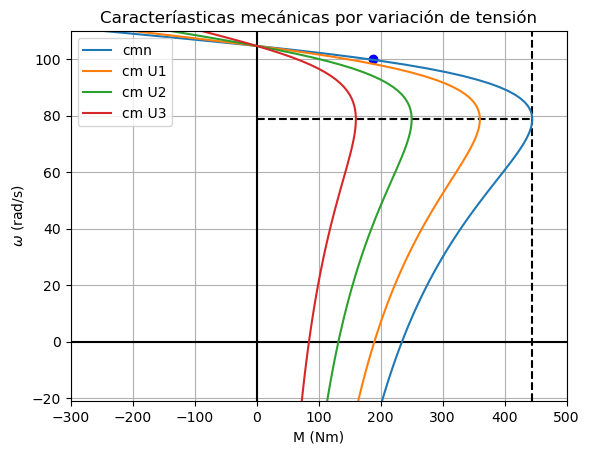

In [12]:
# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# Punto de operación nominal
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))
pyl.plot(Mn, wn, 'bo')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(M_U1, w, label="cm U1")
pyl.plot(M_U2, w, label="cm U2")
pyl.plot(M_U3, w, label="cm U3")

# Detalles del gráfico
pyl.title("Caracteríasticas mecánicas por variación de tensión")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** Muy limitado porque no varía el deslizamiento crítico.

**Gradualidad** es suave pues depende del ángulo de disparo.

**Estabilidad** empeora pues la rigidez disminuye con la disminución del momento crítico al mantenerse constante el deslizamiento crítico.

**Factibilidad Económica** Inversión inicial relativamente baja. La eficiencia energética es aceptable.

**Carga permisible** Carga tipo ventilador.

**Dirección del control** Por debajo de las velocidades básicas.